In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load the data from the CSV file
file_path = "Used Car Dataset.csv"
data = pd.read_csv(file_path)

In [9]:
# Display the first few rows of the data
print(data.head())

   Unnamed: 0  seats  kms_driven  manufacturing_year  mileage(kmpl)  \
0           0      5       56000                2017           7.81   
1           1      5       30615                2020          17.40   
2           2      5       24000                2018          20.68   
3           3      5       18378                2019          16.50   
4           4      5       44900                2019          14.67   

   engine(cc)  max_power(bhp)  torque(Nm)  price(in lakhs)  
0        2996            2996         333            63.75  
1         999             999        9863             8.99  
2        1995            1995         188            23.75  
3        1353            1353       13808            13.56  
4        1798            1798       17746            24.00  


In [10]:
X = data['kms_driven'].values.reshape(-1, 1)
y = data['price(in lakhs)'].values.reshape(-1, 1)

print(X)
print(y)

[[56000]
 [30615]
 [24000]
 ...
 [49000]
 [40000]
 [34756]]
[[63.75]
 [ 8.99]
 [23.75]
 ...
 [ 5.85]
 [ 4.75]
 [ 6.1 ]]


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled] 

In [13]:
X_b

array([[ 1.        ,  0.06656702],
       [ 1.        , -0.56087911],
       [ 1.        , -0.72438339],
       ...,
       [ 1.        , -0.10645338],
       [ 1.        , -0.32890818],
       [ 1.        , -0.45852518]])

In [14]:
theta = np.random.randn(2,1)

In [15]:
theta

array([[ 0.38597899],
       [-3.17685166]])

In [16]:
learning_rate = 0.01
n_iterations = 1000

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [18]:
LR_Model = LinearRegression()

In [19]:
import pandas as pd
file_path = "Used Car Dataset.csv"
data = pd.read_csv(file_path)

In [20]:
data

,Unnamed: 0,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,5,56000,2017,7.81,2996,2996,333,63.75
1,1,5,30615,2020,17.40,999,999,9863,8.99
2,2,5,24000,2018,20.68,1995,1995,188,23.75
3,3,5,18378,2019,16.50,1353,1353,13808,13.56
4,4,5,44900,2019,14.67,1798,1798,17746,24.00
...,...,...,...,...,...,...,...,...,...
1485,1547,7,26500,2022,26.11,1462,1462,8663,11.50
1486,1548,5,35000,2020,1493.00,11345,11345,250,17.41
1487,1550,5,49000,2017,17.50,1199,1199,887,5.85
1488,1551,5,40000,2018,18.78,999,999,75,4.75


In [21]:
x = data['kms_driven'].values.reshape(-1,1)
y = data['price(in lakhs)'].values.reshape(-1,1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
LR_Model.fit(x_train, y_train)

LinearRegression()

In [25]:
print("Intercept:", LR_Model.intercept_)
print("Coefficients:", LR_Model.coef_)

Intercept: [158.33527734]
Coefficients: [[0.00102912]]


In [26]:
y_train_predict = LR_Model.predict(x_train)
y_test_predict = LR_Model.predict(x_test)

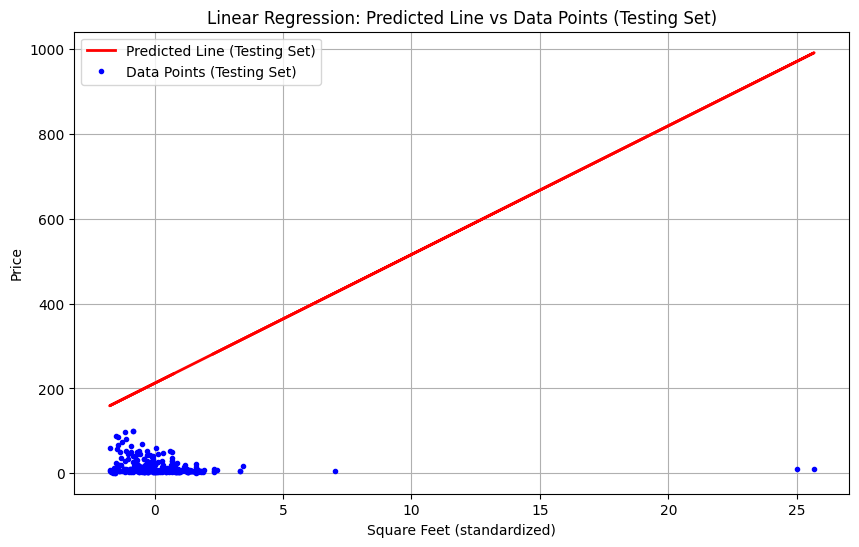

In [27]:
# Plotting the results for the testing set
plt.figure(figsize=(10, 6))
plt.plot(x_test_scaled, y_test_predict, "r-", linewidth=2, label="Predicted Line (Testing Set)")
plt.plot(x_test_scaled, y_test, "b.", label="Data Points (Testing Set)")
plt.xlabel("Square Feet (standardized)")
plt.ylabel("Price")
plt.title("Linear Regression: Predicted Line vs Data Points (Testing Set)")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
tuned_parameters = {
    'c':[10**-4,10**2,10**0,10**2,10**4],
    'penalty':['L2','L1'],
    'solver':['liblinear','lbfgs'],
    'max_iter':[100,200,300]
}

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [31]:
model = GridSearchCV(LinearRegression(),tuned_parameters,cv=5)

In [32]:
model.fit(x_train,y_train)
print(model.best_estimator_)
print(model.score(x_test,y_test))

ValueError: Invalid parameter 'c' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].